In [47]:
#DEEP LEARNING ASSIGNMENT---(18csu106) Kashish Bhagat

Using the code from the lecture as the basis, fiddle with the hyperparameters of the algorithm.

1. The *width* (the hidden layer size) of the algorithm. Try a hidden layer size of 200. How does the validation accuracy of the model change? What about the time it took the algorithm to train? Can you find a hidden layer size that does better?

2. The *depth* of the algorithm. Add another hidden layer to the algorithm. This is an extremely important exercise! How does the validation accuracy change? What about the time it took the algorithm to train? Hint: Be careful with the shapes of the weights and the biases.

3. The *width and depth* of the algorithm. Add as many additional layers as you need to reach 5 hidden layers. Moreover, adjust the width of the algorithm as you find suitable. How does the validation accuracy change? What about the time it took the algorithm to train?

4. Fiddle with the activation functions. Try applying sigmoid transformation to both layers. The sigmoid activation is given by the string 'sigmoid'.

5. Fiddle with the activation functions. Try applying a ReLu to the first hidden layer and tanh to the second one. The tanh activation is given by the string 'tanh'.

6. Adjust the batch size. Try a batch size of 10000. How does the required time change? What about the accuracy?

7. Adjust the batch size. Try a batch size of 1. That's the SGD. How do the time and accuracy change? Is the result coherent with the theory?

8. Adjust the learning rate. Try a value of 0.0001. Does it make a difference?

9. Adjust the learning rate. Try a value of 0.02. Does it make a difference?

10. Combine all the methods above and try to reach a validation accuracy of 98.5+ percent.

In [3]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import tensorflow
import tensorflow_datasets as tfds

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1st Network

In [5]:
image_size = 784 
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
model = Sequential()


model.add(Dense(units=200, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=.1,validation_data=(x_test,y_test))


Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9273 - accuracy: 0.7468 - val_loss: 0.3221 - val_accuracy: 0.9192
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3655 - accuracy: 0.8995 - val_loss: 0.2543 - val_accuracy: 0.9342
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.9193 - val_loss: 0.2325 - val_accuracy: 0.9358
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9245 - val_loss: 0.2178 - val_accuracy: 0.9410
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9300 - val_loss: 0.2000 - val_accuracy: 0.9467


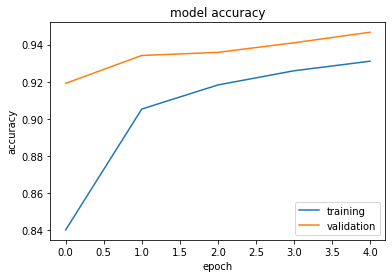

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

2nd Network:

In [19]:
model_1 = Sequential()
model_1.add(Dense(units=200, activation='sigmoid', input_shape=(image_size,)))
model_1.add(Dense(units=200,activation='sigmoid'))
model_1.add(Dense(units=num_classes, activation='softmax'))
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(x_train, y_train, epochs=15, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9263 - val_loss: 0.2097 - val_accuracy: 0.9433
Epoch 2/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2430 - accuracy: 0.9320 - val_loss: 0.2001 - val_accuracy: 0.9480
Epoch 3/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2272 - accuracy: 0.9365 - val_loss: 0.1909 - val_accuracy: 0.9473
Epoch 4/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2223 - accuracy: 0.9393 - val_loss: 0.1817 - val_accuracy: 0.9507
Epoch 5/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2100 - accuracy: 0.9410 - val_loss: 0.1713 - val_accuracy: 0.9570
Epoch 6/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1961 - accuracy: 0.9459 - val_loss: 0.1664 - val_accuracy: 0.9562
Epoch 7/15
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1872 - accuracy: 0.9473 - val_loss: 0.1551 - val_accuracy:

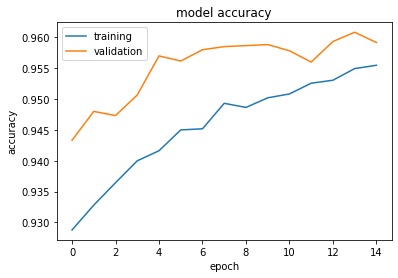

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

3rd Network--->

In [23]:
model_2 = Sequential()
model_2.add(Dense(units=200, activation='sigmoid', input_shape=(image_size,)))
model_2.add(Dense(units=128,activation='sigmoid'))
model_2.add(Dense(units=64,activation='sigmoid'))
model_2.add(Dense(units=100,activation='sigmoid'))
model_2.add(Dense(units=50,activation='sigmoid'))
model_2.add(Dense(units=num_classes, activation='softmax'))
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 203,044
Trainable params: 203,044
Non-trainable params: 0
________________________________________________

In [25]:
model_2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=35, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
1688/1688 [==============================] - 4s 2ms/step - loss: 1.0323 - accuracy: 0.6525 - val_loss: 0.9255 - val_accuracy: 0.7097
Epoch 2/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9335 - accuracy: 0.6995 - val_loss: 0.8611 - val_accuracy: 0.7682
Epoch 3/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8569 - accuracy: 0.7556 - val_loss: 0.7594 - val_accuracy: 0.8057
Epoch 4/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7939 - accuracy: 0.7822 - val_loss: 0.7099 - val_accuracy: 0.8092
Epoch 5/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7136 - accuracy: 0.8052 - val_loss: 0.6594 - val_accuracy: 0.8148
Epoch 6/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6690 - accuracy: 0.8163 - val_loss: 0.6227 - val_accuracy: 0.8348
Epoch 7/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6551 - accuracy: 0.8182 - val_loss: 0.5895 - val_accuracy:

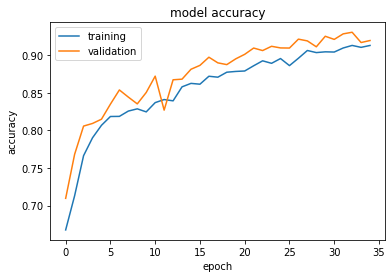

In [26]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Network 4

In [27]:
model_3 = Sequential()
model_3.add(Dense(units=200, activation='relu', input_shape=(image_size,)))
model_3.add(Dense(units=200,activation='tanh'))
model_3.add(Dense(units=num_classes, activation='softmax'))
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_19 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, epochs=35, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9356 - accuracy: 0.7106 - val_loss: 0.3088 - val_accuracy: 0.9075
Epoch 2/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3618 - accuracy: 0.8924 - val_loss: 0.2532 - val_accuracy: 0.9242
Epoch 3/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.9153 - val_loss: 0.2204 - val_accuracy: 0.9375
Epoch 4/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9235 - val_loss: 0.2056 - val_accuracy: 0.9408
Epoch 5/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2413 - accuracy: 0.9261 - val_loss: 0.1923 - val_accuracy: 0.9418
Epoch 6/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2212 - accuracy: 0.9341 - val_loss: 0.1787 - val_accuracy: 0.9477
Epoch 7/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2112 - accuracy: 0.9359 - val_loss: 0.1750 - val_accuracy:

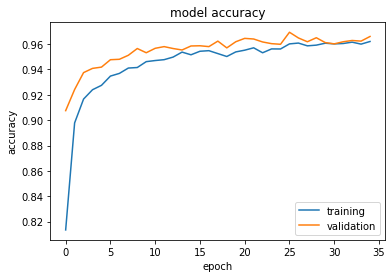

In [29]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Network 5

In [30]:
model_4 = Sequential()
model_4.add(Dense(units=200, activation='relu', input_shape=(image_size,)))
model_4.add(Dense(units=200,activation='tanh'))
model_4.add(Dense(units=num_classes, activation='softmax'))
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_22 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_4.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, epochs=35,batch_size=10000, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
6/6 [==============================] - 0s 41ms/step - loss: 2.7212 - accuracy: 0.1536 - val_loss: 1.9309 - val_accuracy: 0.3227
Epoch 2/35
6/6 [==============================] - 0s 15ms/step - loss: 1.8322 - accuracy: 0.3674 - val_loss: 1.5115 - val_accuracy: 0.4887
Epoch 3/35
6/6 [==============================] - 0s 16ms/step - loss: 1.4744 - accuracy: 0.5081 - val_loss: 1.2597 - val_accuracy: 0.5982
Epoch 4/35
6/6 [==============================] - 0s 14ms/step - loss: 1.2613 - accuracy: 0.5999 - val_loss: 1.0974 - val_accuracy: 0.6683
Epoch 5/35
6/6 [==============================] - 0s 14ms/step - loss: 1.1161 - accuracy: 0.6585 - val_loss: 0.9829 - val_accuracy: 0.7105
Epoch 6/35
6/6 [==============================] - 0s 14ms/step - loss: 1.0121 - accuracy: 0.6982 - val_loss: 0.8998 - val_accuracy: 0.7418
Epoch 7/35
6/6 [==============================] - 0s 16ms/step - loss: 0.9390 - accuracy: 0.7220 - val_loss: 0.8279 - val_accuracy: 0.7678
Epoch 8/35
6/6 [===========

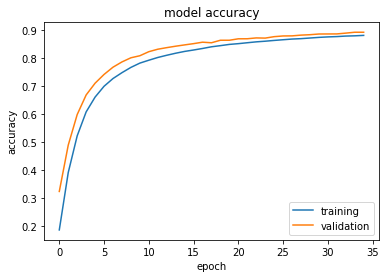

In [32]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Network 6

In [33]:
model_4.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = model_4.fit(x_train, y_train, epochs=35,batch_size=1, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
54000/54000 [==============================] - 101s 2ms/step - loss: 2.7909 - accuracy: 0.1064 - val_loss: 2.5582 - val_accuracy: 0.1045
Epoch 2/35
54000/54000 [==============================] - 100s 2ms/step - loss: 2.8224 - accuracy: 0.1029 - val_loss: 3.7387 - val_accuracy: 0.1113
Epoch 3/35
54000/54000 [==============================] - 101s 2ms/step - loss: 2.7025 - accuracy: 0.1365 - val_loss: 2.7454 - val_accuracy: 0.1953
Epoch 4/35
54000/54000 [==============================] - 101s 2ms/step - loss: 2.4740 - accuracy: 0.2011 - val_loss: 2.9961 - val_accuracy: 0.0958
Epoch 5/35
54000/54000 [==============================] - 100s 2ms/step - loss: 2.7888 - accuracy: 0.1115 - val_loss: 2.5146 - val_accuracy: 0.1987
Epoch 6/35
54000/54000 [==============================] - 100s 2ms/step - loss: 2.3208 - accuracy: 0.2556 - val_loss: 1.9881 - val_accuracy: 0.2372
Epoch 7/35
54000/54000 [==============================] - 97s 2ms/step - loss: 2.3496 - accuracy: 0.2303 - val_l

KeyboardInterrupt: ignored

Network 6

In [34]:
model_5 = Sequential()
model_5.add(Dense(units=200, activation='relu', input_shape=(image_size,)))
model_5.add(Dense(units=200,activation='relu'))
model_5.add(Dense(units=128,activation='relu'))
model_5.add(Dense(units=num_classes, activation='softmax'))
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 224,218
Trainable params: 224,218
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.optimizers import Adam

In [37]:
optimizer=Adam(lr=0.0001)

In [39]:
model_5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_6 = model_5.fit(x_train, y_train, epochs=35, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
1688/1688 [==============================] - 5s 2ms/step - loss: 1.4390 - accuracy: 0.8866 - val_loss: 0.7209 - val_accuracy: 0.9288
Epoch 2/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4700 - accuracy: 0.9434 - val_loss: 0.5722 - val_accuracy: 0.9392
Epoch 3/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2361 - accuracy: 0.9628 - val_loss: 0.4532 - val_accuracy: 0.9482
Epoch 4/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1572 - accuracy: 0.9717 - val_loss: 0.3912 - val_accuracy: 0.9520
Epoch 5/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9788 - val_loss: 0.3663 - val_accuracy: 0.9597
Epoch 6/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0965 - accuracy: 0.9793 - val_loss: 0.3484 - val_accuracy: 0.9600
Epoch 7/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9851 - val_loss: 0.3475 - val_accuracy:

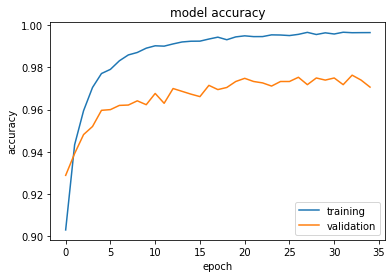

In [40]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Network 7

In [41]:
opt=Adam(lr=0.02)

In [42]:
model_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_7 = model_5.fit(x_train, y_train, epochs=35, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
1688/1688 [==============================] - 5s 3ms/step - loss: 13.7803 - accuracy: 0.5196 - val_loss: 2.7066 - val_accuracy: 0.1000
Epoch 2/35
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3459 - accuracy: 0.1017 - val_loss: 2.3057 - val_accuracy: 0.1050
Epoch 3/35
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3036 - accuracy: 0.1102 - val_loss: 2.3051 - val_accuracy: 0.1050
Epoch 4/35
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.1036 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 5/35
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.1083 - val_loss: 2.3028 - val_accuracy: 0.1050
Epoch 6/35
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3035 - accuracy: 0.1109 - val_loss: 2.3038 - val_accuracy: 0.1045
Epoch 7/35
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3034 - accuracy: 0.1067 - val_loss: 2.3032 - val_accuracy

Network 8 (Combining The Best HyperParameters)

In [44]:
model_new = Sequential()
model_new.add(Dense(units=200, activation='relu', input_shape=(image_size,)))
model_new.add(Dense(units=200,activation='tanh'))
model_new.add(Dense(units=200,activation='tanh'))
model_new.add(Dense(units=200,activation='tanh'))
model_new.add(Dense(units=num_classes, activation='softmax'))
model_new.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_29 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
opti=Adam(lr=0.0001)

In [46]:
model_new.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])
history_new = model_new.fit(x_train, y_train, epochs=35, validation_split=.1,validation_data=(x_test,y_test))

Epoch 1/35
1688/1688 [==============================] - 5s 3ms/step - loss: 0.9797 - accuracy: 0.7004 - val_loss: 0.2777 - val_accuracy: 0.9202
Epoch 2/35
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3137 - accuracy: 0.9026 - val_loss: 0.2143 - val_accuracy: 0.9372
Epoch 3/35
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2484 - accuracy: 0.9225 - val_loss: 0.1884 - val_accuracy: 0.9455
Epoch 4/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2143 - accuracy: 0.9344 - val_loss: 0.1701 - val_accuracy: 0.9503
Epoch 5/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1888 - accuracy: 0.9408 - val_loss: 0.1509 - val_accuracy: 0.9542
Epoch 6/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1673 - accuracy: 0.9472 - val_loss: 0.1438 - val_accuracy: 0.9577
Epoch 7/35
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1609 - accuracy: 0.9501 - val_loss: 0.1508 - val_accuracy:

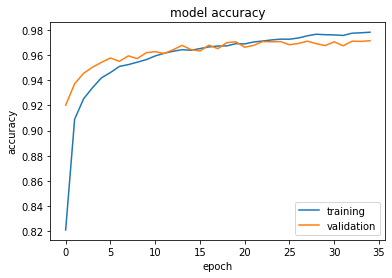

In [48]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()